# Analyzing and Visualizing Penguin Data with ggplot2
### Data Analysis and Visualization using the **palmerpenguins** dataset in R

In this notebook, I leverage the data analysis and visualization skills learned in my **Data Analysis in R** course at **Eastern University**. Using **ggplot2**, I explore and uncover insights from the **palmerpenguins** dataset through compelling visualizations.

### Setup and library imports

In [11]:
# install necessary libraries
install.packages(c("ggplot2", "palmerpenguins", "dplyr", "tidyverse"))
install.packages("corrgram")
install.packages("DataExplorer")


The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmpk1lJyx/downloaded_packages

The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmpk1lJyx/downloaded_packages

The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmpk1lJyx/downloaded_packages


In [52]:
# load libraries
library(palmerpenguins)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(corrgram)
library(DataExplorer)
library(knitr)

# setting ggplot dimensions
options(repr.plot.width = 18, repr.plot.height = 6)

## Dataset Overview
A brief overview of the dataset, including summary statistics and an inspection of the columns and first few rows.

In [3]:
message("glimpse:")
glimpse(penguins)

message("summary:")
summary(penguins)

message("structure:")
str(penguins)

message("first five rows:")
head(penguins, 5)

glimpse:



Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


summary:



      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

structure:



tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


first five rows:



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007


## Data Cleansing and Preprocessing
Data cleaning and transformation steps that are needed to make the data easier to work with.

### General Dataset Metrics
Collecting high-level metrics about column types and missing data in the dataset.

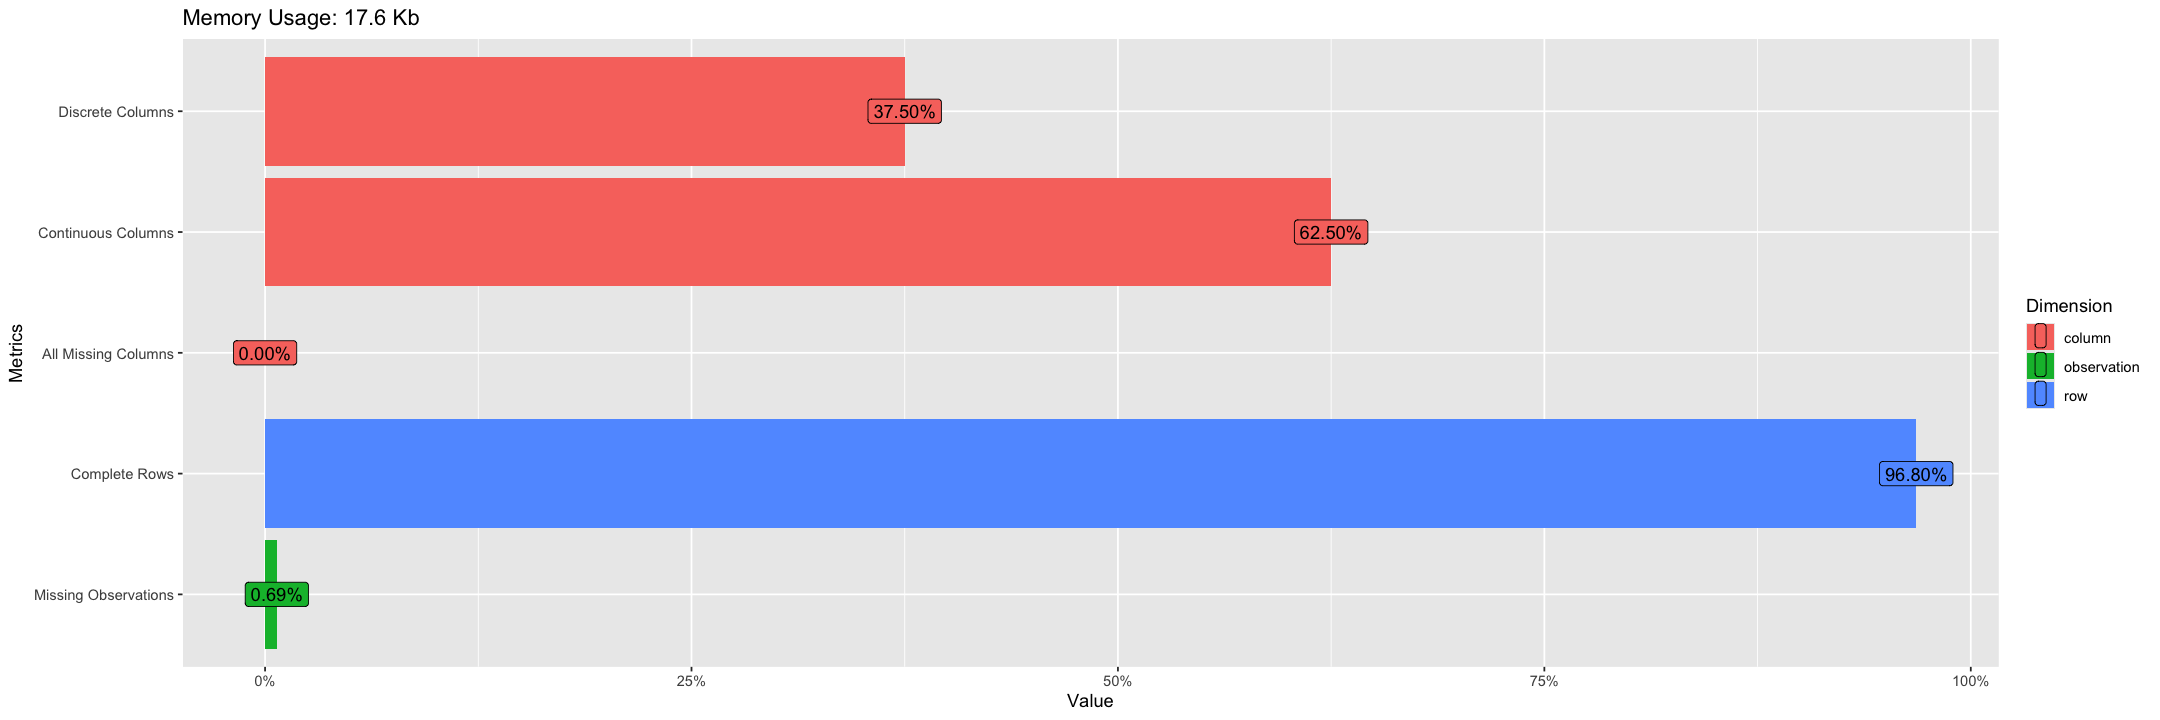

In [14]:
plot_intro(penguins)

### Missing Data
Getting a sense of how much data is missing and where the data are missing in the dataset.

In [4]:
# count of missing values, i.e NAs
sum(is.na(penguins))

[1] 19

In [5]:
# looking exclusively at records where there is a missing, NA value
penguins |>
  filter(if_any(everything(), is.na))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007
Adelie,Torgersen,42.0,20.2,190,4250,NA,2007
Adelie,Torgersen,37.8,17.1,186,3300,NA,2007
Adelie,Torgersen,37.8,17.3,180,3700,NA,2007
Adelie,Dream,37.5,18.9,179,2975,NA,2007
Gentoo,Biscoe,44.5,14.3,216,4100,NA,2007
Gentoo,Biscoe,46.2,14.4,214,4650,NA,2008
Gentoo,Biscoe,47.3,13.8,216,4725,NA,2009


### Outliers
Identifying unusual data points in the dataset that could impact analyses.

#### Visualizing Outliers
NOTE: in order to visualize the data using boxplots, we need to reshape the data using `pivot_longer()` so we can look at boxplots for all the different numeric variables, as opposed to just one.

Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_boxplot()`).”


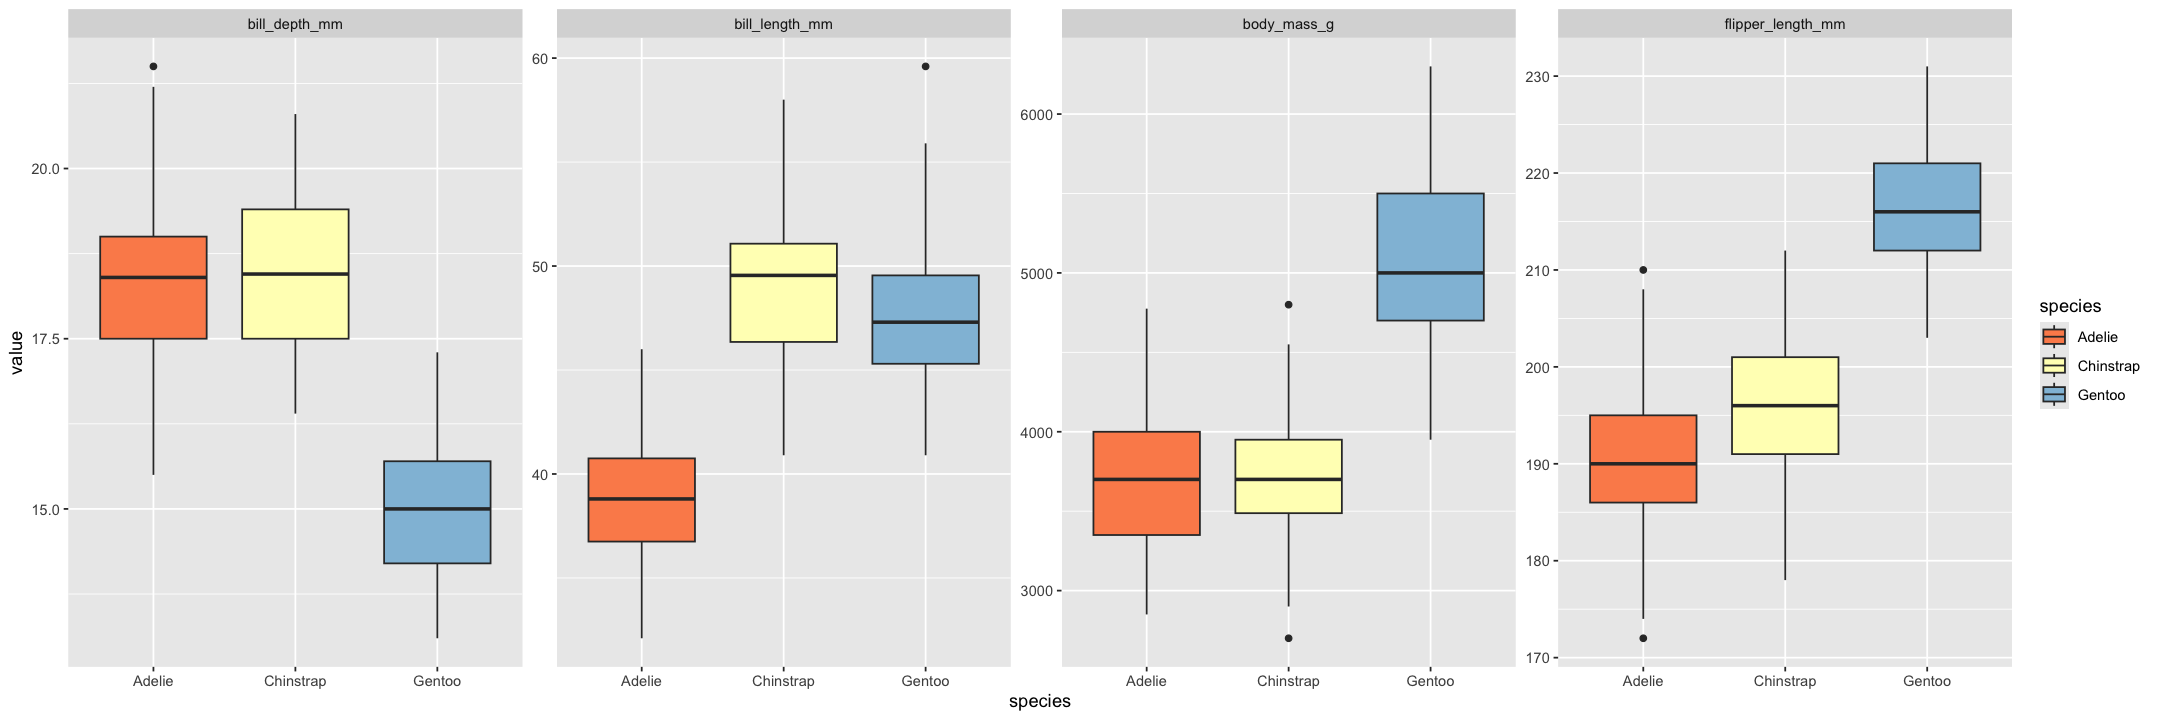

In [42]:
# converts the data into a longer table
penguins_long <- penguins |>
  pivot_longer(
    cols = where(is.numeric) & !c(year), 
    names_to = "variable", # new column to store original column names
    values_to = "value" # new column to store original column values
  )
# create boxplots
ggplot(penguins_long, aes(x = species, y = value, fill = species)) +
  geom_boxplot() +
  # geom_jitter() +
  facet_wrap(~variable, 
             scales = "free_y", # give each variable it's own y-axis
             ncol = 4 # make the plots 1x4
  ) +
  scale_fill_brewer(palette = "RdYlBu")

## Exploratory Analysis

### Basic Stats
#### Preview 5 records from the dataset.

In [55]:
head(penguins, 5)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007


#### Which years are covered in the dataset?

In [71]:
cat("Distinct Years in the Penguins Dataset:\n")
print(penguins |> distinct(year) |> pull(year))

Distinct Years in the Penguins Dataset:
[1] 2007 2008 2009


#### Which species are on which islands?

In [76]:
cat("Unique Combinations of Species and Islands in the Penguins Dataset:\n")
print(penguins |> distinct(species, island) |> pull(island, species))

Unique Combinations of Species and Islands in the Penguins Dataset:
   Adelie    Adelie    Adelie    Gentoo Chinstrap 
Torgersen    Biscoe     Dream    Biscoe     Dream 
Levels: Biscoe Dream Torgersen


#### What is the weight distribution for each species of penguins?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


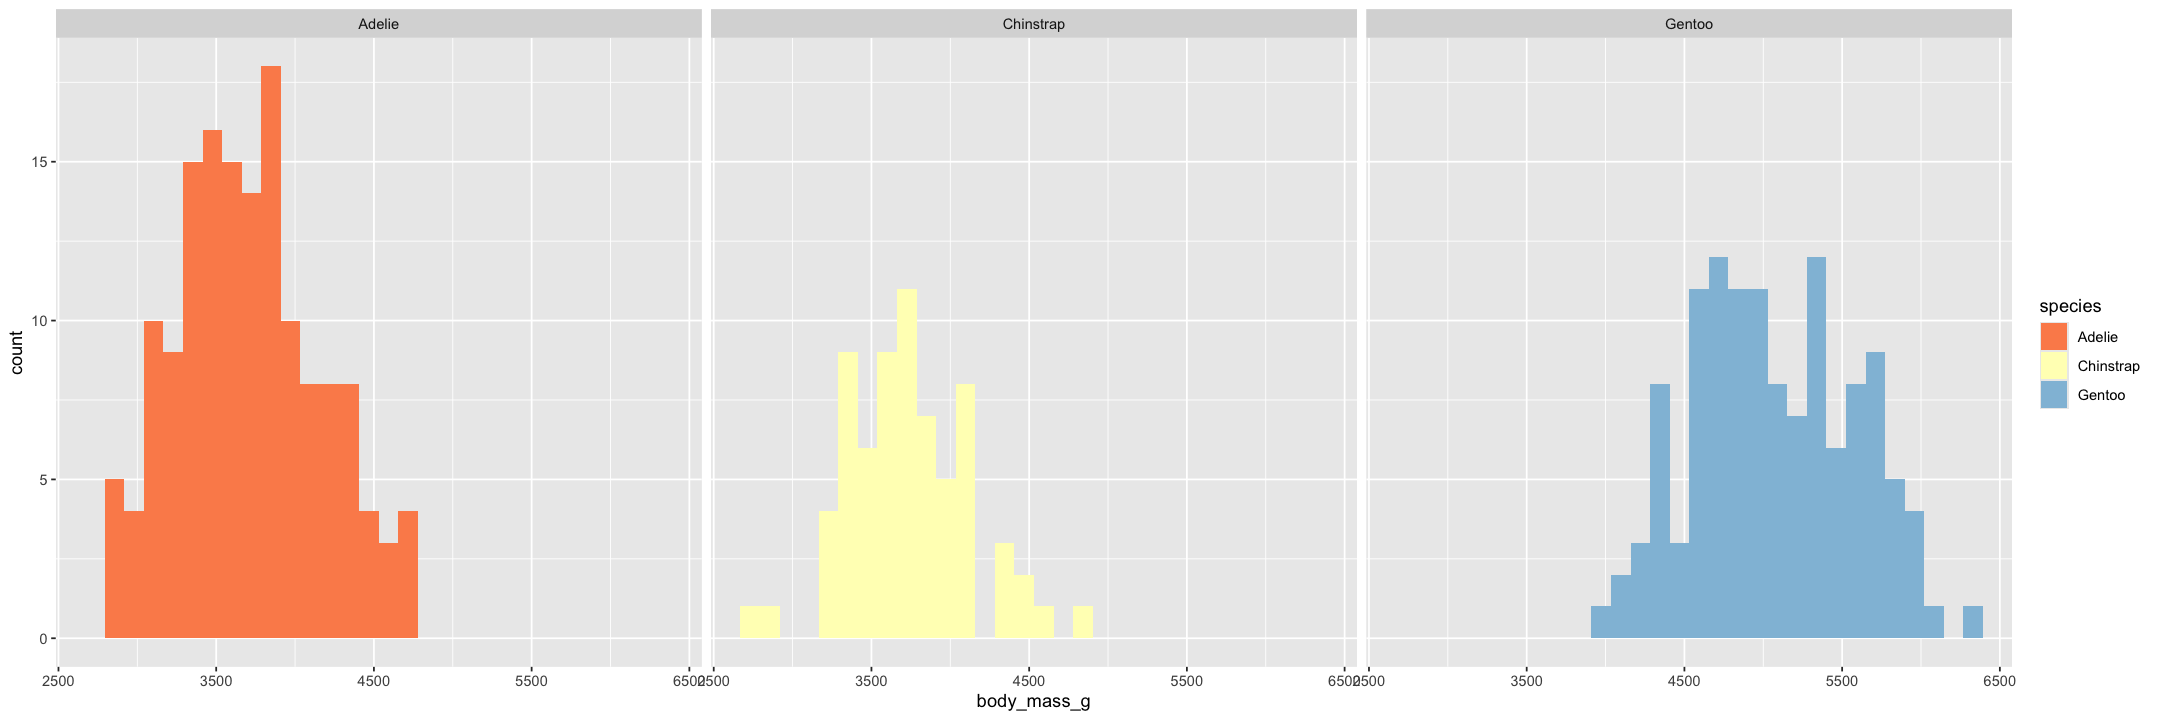

In [77]:
ggplot(penguins, aes(x = body_mass_g, fill = species)) +
  geom_histogram() +
  facet_wrap(~species) +
  scale_fill_brewer(palette = "RdYlBu")